In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

**Exploración Inicial del Dataset**

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Evaluar las dimensiones del dataset
print(f"Dimensiones del dataset: {titanic.shape}")
print(f"Cantidad de filas: {titanic.shape[0]}")
print(f"Cantidad de columnas: {titanic.shape[1]}")

# Mostrar nombres de columnas
print("\nNombres de las columnas:")
print(titanic.columns.tolist())

Dimensiones del dataset: (891, 12)
Cantidad de filas: 891
Cantidad de columnas: 12

Nombres de las columnas:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [ ]:
# Verificar tipos de datos y valores nulos
print("\nTipos de datos y valores nulos:")
print(titanic.info())


Tipos de datos y valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
# Descripción estadística básica de las columnas numéricas
print("\nDescripción estadística de columnas numéricas:")
print(titanic.describe())


Descripción estadística de columnas numéricas:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


Limpieza de datos

In [ ]:
# Identificar valores nulos
print("\nValores nulos por columna:")
print(titanic.isnull().sum())

# Porcentaje de valores nulos por columna
print("\nPorcentaje de valores nulos por columna:")
print((titanic.isnull().sum() / len(titanic) * 100).round(2))

# Verificar si el dataset tiene algún valor nulo
if titanic.isnull().values.any():
    print("\nEl dataset contiene valores nulos.")
else:
    print("\nEl dataset no contiene valores nulos.")


Valores nulos por columna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Porcentaje de valores nulos por columna:
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

El dataset contiene valores nulos.


 Se valores faltantes en la columna 'Age' (numérica)

In [ ]:
# Usaremos la mediana como valor de imputación
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

# **One Hot Enconding**



In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

Transformar variables categóricas

In [ ]:
transformer = make_column_transformer((OneHotEncoder(), ['Sex','Embarked']), remainder='drop')

In [ ]:
transformed = transformer.fit_transform(titanic)
print(transformed)

[[0. 1. 0. 0. 1. 0.]
 [1. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0.]
 ...
 [1. 0. 0. 0. 1. 0.]
 [0. 1. 1. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [ ]:
transformer.get_feature_names_out()

array(['onehotencoder__Sex_female', 'onehotencoder__Sex_male',
       'onehotencoder__Embarked_C', 'onehotencoder__Embarked_Q',
       'onehotencoder__Embarked_S', 'onehotencoder__Embarked_nan'],
      dtype=object)

Convertir en Dataframe el array de datos transformados

In [ ]:
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out().tolist())

In [ ]:
transformed_df.head()

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Embarked_nan
0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0


Crear una lista con el DataFrame de variables transformadas y el DataFrame inicial (Titanic) eliminando las variables que han sido transformadas, del mismo

In [ ]:
lista = [transformed_df, titanic.drop(['Sex','Embarked'], axis=1)]

Concatenar la lista para conformar un único DataFrame (Inicial Titanic con los atributos transformados)

In [ ]:
df_transformed = pd.concat(lista, axis=1)
df_transformed.head(3)

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Embarked_nan,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin
0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN
1,1.0,0.0,1.0,0.0,0.0,0.0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85
2,1.0,0.0,0.0,0.0,1.0,0.0,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN


Crear un DataFrame con solo los valores numéricos

In [ ]:
df_num = df_transformed.select_dtypes('number')
df_num.head(5)

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Embarked_nan,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,3,22.0,1,0,7.2500
1,1.0,0.0,1.0,0.0,0.0,0.0,2,1,1,38.0,1,0,71.2833
2,1.0,0.0,0.0,0.0,1.0,0.0,3,1,3,26.0,0,0,7.9250
3,1.0,0.0,0.0,0.0,1.0,0.0,4,1,1,35.0,1,0,53.1000
4,0.0,1.0,0.0,0.0,1.0,0.0,5,0,3,35.0,0,0,8.0500


Denifir variables que explican el modelo, y la varibale a predecir

In [ ]:
df_num.dropna(inplace=True)
x = df_num.drop('Survived', axis=1) # se elimina la variable a predecir de las variables x que explican el modelo
y = df_num['Survived'] # se define como variable a predecir "Survived"

Prueba de modelos de Clasificación sin incluir Backtesting

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
random = RandomForestClassifier(max_depth=2) # instanciar el objeto
random.fit(x,y) # Ajuste con los datos del Titanic
y_pred = random.predict(x) # Predicción
print("Accuracy:",metrics.accuracy_score(y, y_pred))

Accuracy: 0.7878787878787878


KNN (Vecinos cercanos)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
vecinos = KNeighborsClassifier(n_neighbors=3) # instanciar el objeto
vecinos.fit(x,y) # Ajuste a los datos del Titanic
y_pred = vecinos.predict(x) # Prediccion
print('Accuracy:', metrics.accuracy_score(y, y_pred))

Accuracy: 0.8002244668911336


Logit

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logit = LogisticRegression(random_state=0). fit(x,y)
y_pred = logit.predict(x)
print('Accuracy:', metrics.accuracy_score(y,y_pred))

Accuracy: 0.7946127946127947


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Se realiza Matriz de Confusión

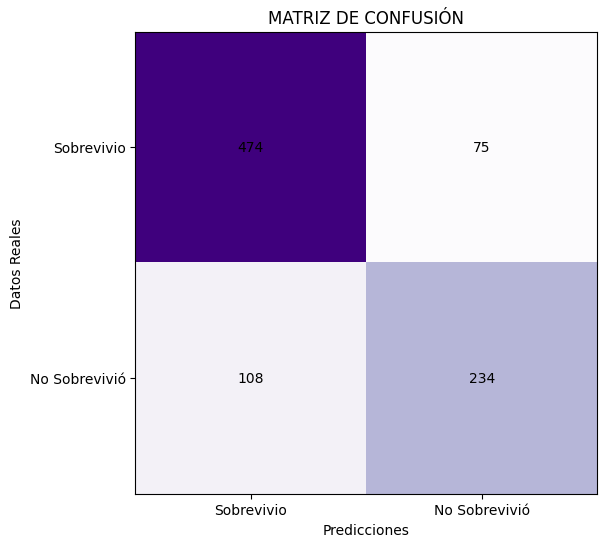

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y, y_pred) #Creación de matriz de confusión
labels = ['Sobrevivio', 'No Sobrevivió'] # Etiquetas para la matriz de Confusión
fig, ax = plt.subplots(figsize=(8,6)) # Se crea figura y eje

ax.imshow(matriz, interpolation='nearest', cmap='Purples')
ax.set_title('MATRIZ DE CONFUSIÓN')
ax.set_xlabel('Predicciones')
ax.set_ylabel('Datos Reales')
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

#mostrar valores en la matriz
for i in range(matriz.shape[0]):
  for j in range(matriz.shape[1]):
    ax.text(j, i, matriz[i,j], ha= 'center', va='center', color='black')

plt.show()


## **Nuevo Feature Engineering para mejorar el Accuracy del Modelo**

Se crea nuevo Feature para el DataFrame trabajado, que representa el número total de integrantes que viajan por familia

In [ ]:
df_num['FamilySize'] = df_num['SibSp'] + df_num['Parch'] + 1

Se visualiza el nuevo Feature dentro del DataFrame

In [ ]:
df_num.head(5)

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Embarked_nan,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,3,22.0,1,0,7.2500,2
1,1.0,0.0,1.0,0.0,0.0,0.0,2,1,1,38.0,1,0,71.2833,2
2,1.0,0.0,0.0,0.0,1.0,0.0,3,1,3,26.0,0,0,7.9250,1
3,1.0,0.0,0.0,0.0,1.0,0.0,4,1,1,35.0,1,0,53.1000,2
4,0.0,1.0,0.0,0.0,1.0,0.0,5,0,3,35.0,0,0,8.0500,1


Se crea nuevo Feature para el DataFrame, para indicar las personas que viajan solas

In [ ]:
df_num['IsAlone'] = (df_num['FamilySize'] == 1).astype(int)

In [ ]:
df_num.head(5)

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Embarked_nan,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone
0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,3,22.0,1,0,7.2500,2,0
1,1.0,0.0,1.0,0.0,0.0,0.0,2,1,1,38.0,1,0,71.2833,2,0
2,1.0,0.0,0.0,0.0,1.0,0.0,3,1,3,26.0,0,0,7.9250,1,1
3,1.0,0.0,0.0,0.0,1.0,0.0,4,1,1,35.0,1,0,53.1000,2,0
4,0.0,1.0,0.0,0.0,1.0,0.0,5,0,3,35.0,0,0,8.0500,1,1


Se evalúa el Modelo Random Forest

In [ ]:
random = RandomForestClassifier(max_depth=2) # instanciar el objeto
random.fit(x,y) # Ajuste con los datos del Titanic
y_pred = random.predict(x) # Predicción
print("Accuracy:",metrics.accuracy_score(y, y_pred))

Accuracy: 0.7878787878787878


Para el modelo Random Forest se observó que el modelo mejora el Accuracy de 78% al 79%.

Se verifica la distribución del Feature 'FamilySize'

In [ ]:
Familias = df_num.groupby('FamilySize').size()
Familias

,0
FamilySize,
1,537
2,161
3,102
4,29
5,15
6,22
7,12
8,6
11,7


Debido a que se observa que hay una concentración mayor de personas que viajan solas y en pareja, se analiza que se podría crear nuevo Feature a partir del número de integrantes de la familia, y verificar si así la nueva variable pueden explicar mejor el comportamiento del modelo e incrementar su "Accuracy"

In [ ]:
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Medium', 5: 'Medium', 6:'Large', 7: 'Large', 8: 'Large'}
df_num['Family_Size_Grouped'] = df_num['FamilySize'].map(family_map)
df_num.head(5)

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Embarked_nan,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Family_Size_Grouped
0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,3,22.0,1,0,7.2500,2,0,Small
1,1.0,0.0,1.0,0.0,0.0,0.0,2,1,1,38.0,1,0,71.2833,2,0,Small
2,1.0,0.0,0.0,0.0,1.0,0.0,3,1,3,26.0,0,0,7.9250,1,1,Alone
3,1.0,0.0,0.0,0.0,1.0,0.0,4,1,1,35.0,1,0,53.1000,2,0,Small
4,0.0,1.0,0.0,0.0,1.0,0.0,5,0,3,35.0,0,0,8.0500,1,1,Alone


In [ ]:
ordinal_map = {'Alone': 0, 'Small': 1, 'Medium': 2, 'Large': 3}

In [ ]:
df_num['Family_Size_Ordinal'] = df_num['Family_Size_Grouped'].map(ordinal_map)
df_num.head()

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Embarked_nan,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Family_Size_Grouped,Family_Size_Ordinal
0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,3,22.0,1,0,7.2500,2,0,Small,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,2,1,1,38.0,1,0,71.2833,2,0,Small,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,3,1,3,26.0,0,0,7.9250,1,1,Alone,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,4,1,1,35.0,1,0,53.1000,2,0,Small,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,5,0,3,35.0,0,0,8.0500,1,1,Alone,0.0


Elimino la columna con datos categóricos

In [ ]:
df_num.drop(columns=['Family_Size_Grouped'], inplace = True)

In [ ]:
df_num.head()

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Embarked_nan,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Family_Size_Ordinal
0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,3,22.0,1,0,7.2500,2,0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,2,1,1,38.0,1,0,71.2833,2,0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,3,1,3,26.0,0,0,7.9250,1,1,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,4,1,1,35.0,1,0,53.1000,2,0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,5,0,3,35.0,0,0,8.0500,1,1,0.0


**Se separan los datos para entrenamiento y pruebas del modelo**

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

In [ ]:
print(f"Dimensiones de X_train: {x_train.shape}")
print(f"Dimensiones de X_test: {x_test.shape}")

Dimensiones de X_train: (596, 12)
Dimensiones de X_test: (295, 12)


Se ajusta el modelo Random Forest y se calcula "Precisión"

Precisión

In [ ]:
random = RandomForestClassifier(random_state=42) # instanciar el objeto
random.fit(x_train,y_train) # Ajuste con los datos del Titanic
y_pred = random.predict(x_test) # Predicción
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7830508474576271


Recall (sensibilidad)

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.6198347107438017

F1-score

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.7009345794392523

AUC-ROC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Obtener las probabilidades de predicción para la clase positiva
y_prob = random.predict_proba(x_test)[:, 1]

# Calcular la Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

print('roc_auc_score for RandomForest: ', roc_auc_score(y_test, y_prob))

# Calcular el AUC (Área bajo la curva)
roc_auc = auc(fpr, tpr)

roc_auc_score for RandomForest:  0.8276812007219531


Log loss

In [ ]:
from sklearn.metrics import log_loss

# Calcular el Log Loss
loss = log_loss(y_test, y_prob)
print(f"Log Loss: {loss}")

Log Loss: 0.6178090894117098


## **Nueva Matriz de Confusión**

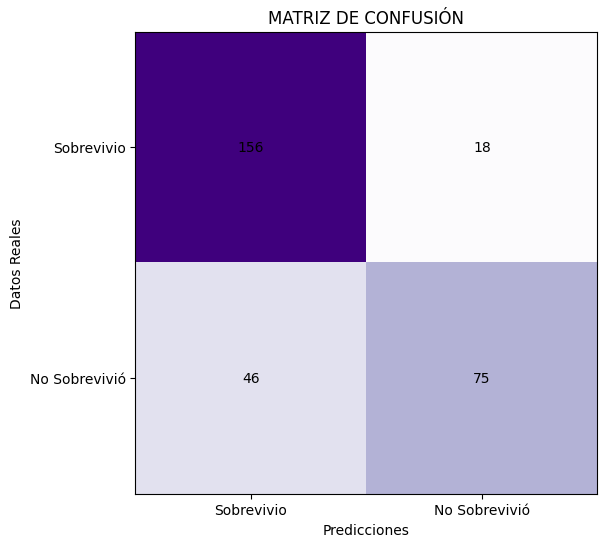

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_pred) #Creación de matriz de confusión
labels = ['Sobrevivio', 'No Sobrevivió'] # Etiquetas para la matriz de Confusión
fig, ax = plt.subplots(figsize=(8,6)) # Se crea figura y eje

ax.imshow(matriz, interpolation='nearest', cmap='Purples')
ax.set_title('MATRIZ DE CONFUSIÓN')
ax.set_xlabel('Predicciones')
ax.set_ylabel('Datos Reales')
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

#mostrar valores en la matriz
for i in range(matriz.shape[0]):
  for j in range(matriz.shape[1]):
    ax.text(j, i, matriz[i,j], ha= 'center', va='center', color='black')

plt.show()

**Análisis de la Matriz de Confusión**

Se realiza el siguiente análisis:

Falsos Positivos (18) vs. Falsos Negativos (46):

El modelo tiene menos falsos positivos (18) que falsos negativos (46). Esto indica que el modelo tiende a ser más conservador al predecir "Sobrevivió". Es decir, está menos dispuesto a cometer el error de clasificar erróneamente a alguien como sobreviviente cuando no lo es.

Esto quiere decir que el modelo clasifica con mayor confianza la clase "No sobrevivió".

Predicción de "Sobrevivió" (VP y FN):

Aunque hay más verdaderos positivos (156) que falsos negativos (46), lo que indica que el modelo es bueno identificando sobrevivientes, el mayor número de falsos negativos muestra que hay margen de mejora en identificar correctamente a todos los que realmente sobrevivieron.

Predicción de "No sobrevivió" (VN y FP):

Hay 75 verdaderos negativos y solo 18 falsos positivos, lo que implica que el modelo es más preciso al identificar correctamente a quienes no sobrevivieron.


# **Segunda Entrega - Revisión de Outliers**

Se realiza el ajuste al modelo de Random Forest y se evalúa el Accuracy y el F1-Score

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Entrenar modelo
clasif = RandomForestClassifier(random_state=42)
clasif.fit(x_train, y_train)

# Predecir y evaluar
y_pred = clasif.predict(x_test)

# Evalúo la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Evalúo el F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1-score: %.3f' % f1)

Accuracy: 0.7830508474576271
F1-score: 0.777


# **Isolation Forest**

Se identifican los outliers y se seleccionan las filas que no son outliers de la data de entrenamiento (x_train, y y_train)

In [ ]:
from sklearn.ensemble import IsolationForest

# identificar outliers en el dataset de train
iso = IsolationForest(contamination=0.1) # contamination = proporcion de outliers esperada
yhat = iso.fit_predict(x_train)

# Verificar el número de outliers detectados
n_outliers = sum(yhat == -1)
n_normales = sum(yhat == 1)

print(f"Número de outliers detectados: {n_outliers}")
print(f"Número de muestras normales: {n_normales}")

Número de outliers detectados: 60
Número de muestras normales: 536


Se filtran los outliers de x_train

In [ ]:
# Crear una máscara para filas normales
mask = yhat == 1  # True para normales, False para outliers

# Filtrar las filas normales
x_train_cleaned = x_train[mask]

Se filtran los outliers de y_train

In [ ]:
# Filtrar las etiquetas correspondientes en y_train
y_train_cleaned = y_train[mask]

Validación del filtrado

In [ ]:
print("Tamaño original de x_train:", x_train.shape)
print("Tamaño original de y_train:", y_train.shape)

print("Tamaño filtrado de x_train:", x_train_cleaned.shape)
print("Tamaño filtrado de y_train:", y_train_cleaned.shape)

Tamaño original de x_train: (596, 12)
Tamaño original de y_train: (596,)
Tamaño filtrado de x_train: (536, 12)
Tamaño filtrado de y_train: (536,)


**Análisis del resultado de la aplicación de Isolation Forest**

**1. Tamaño original:**

x_train: 596 filas y 12 columnas (596 muestras, cada una con 12 características).
y_train: 536 etiquetas, alineadas con las filas de x_train.

**2. Tamaño filtrado:**

x_train_cleaned: 536 filas (60 muestras fueron identificadas como outliers y eliminadas).
y_train_cleaned: 536 etiquetas (las correspondientes a las filas normales en x_train_cleaned).

El tamaño reducido indica que las 60 filas que contenían outliers se eliminaron de ambos conjuntos, y las dimensiones de x_train_cleaned y y_train_cleaned coinciden, lo cual se requiere para entrenar un modelo supervisado.

Se vuelve a evaluar el modelo de Randon Forest posterior al retiro de outliers.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Se entrena el modelo con los datos filtrados
clasif = RandomForestClassifier(random_state=42)
clasif.fit(x_train_cleaned, y_train_cleaned)  # Datos sin outliers

# Se predice en el conjunto de prueba original (x_test y y_test)
y_pred = clasif.predict(x_test)

# Se evalua la precisión (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy después de filtrar outliers:", accuracy)

# Se evalúa el F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1-score: %.3f' % f1)

Accuracy después de filtrar outliers: 0.7728813559322034
F1-score: 0.768


Recall

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.628099173553719

AUC_ROC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Obtener las probabilidades de predicción para la clase positiva
y_prob = random.predict_proba(x_test)[:, 1]

# Calcular la Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

print('roc_auc_score for RandomForest: ', roc_auc_score(y_test, y_prob))

# Calcular el AUC (Área bajo la curva)
roc_auc = auc(fpr, tpr)

roc_auc_score for RandomForest:  0.8276812007219531


Log loss

In [ ]:
from sklearn.metrics import log_loss

# Calcular el Log Loss
loss = log_loss(y_test, y_prob)
print(f"Log Loss: {loss}")

Log Loss: 0.6178090894117098


El retiro de Outliers no genéro mejoras en las métricas, respecto del Modelo base. Ver comparativo en el Readme.md

Validación Matriz de Confusión

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[152  22]
 [ 44  77]]


# **Segunda Entrega - Reducción de Dimensionalidad**

Se verifica si existe correlación entre las variables del modelo (multicolinealidad), y se puede aplicar la reducción de dimensionalidad. Para la revisión únicamente se tendrán en cuenta las variables numéricas reales, es decir, no se tomarán en cuenta las variables a las que se aplicó One Hot Encoding, ya que corresponde a datos transformados.

El Análisis de Componentes Principales (PCA) es una técnica de reducción de dimensionalidad que transforma los datos originales en un conjunto de nuevas variables (componentes principales). Estas nuevas variables son combinaciones lineales de las variables originales y se calculan de forma que expliquen la mayor variación posible en los datos, y estos datos transformados por One Hot Encoding no aportan la información necesaria.

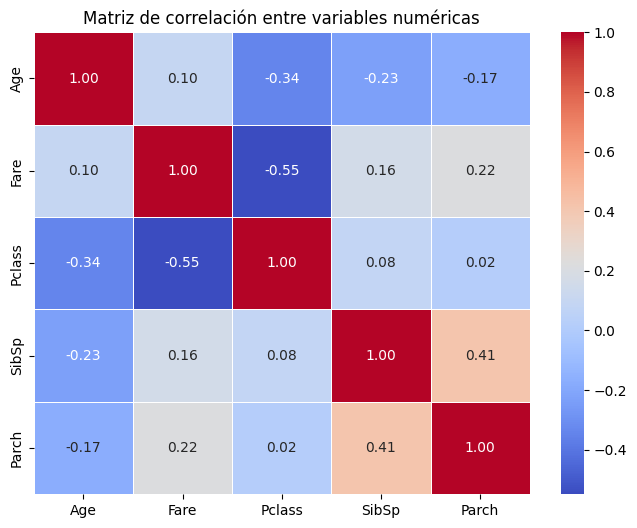

In [ ]:
# Selección de variables numéricas
num_features = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']

# Crear matriz de correlación
correlation_matrix = titanic[num_features].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

Age (Edad):

Tiene poca correlación con las demás variables. Los valores más cercanos a 0 indican que no hay una relación fuerte entre la edad y otras variables como Fare, Pclass, SibSp o Parch.

Fare (Tarifa):

Correlación negativa moderada con Pclass (-0.55), lo que tiene sentido: los pasajeros de clases más altas pagaban tarifas más altas.
Poca correlación positiva con Parch (0.22) y SibSp (0.16), lo que sugiere una ligera relación entre el tamaño del grupo familiar y la tarifa pagada.

Pclass (Clase):

Fuerte correlación negativa con Fare (-0.55), como se mencionó.
Muy poca correlación con Age, SibSp y Parch, indicando que la clase del pasajero no depende fuertemente de la edad o del tamaño del grupo familiar.

SibSp (Hermanos/Pareja a bordo):

Correlación positiva moderada con Parch (0.41), lo que tiene sentido, ya que es probable que los pasajeros con más hermanos/parejas también viajen con más padres/hijos.

Parch (Padres/Hijos a bordo):

Relación positiva con SibSp (0.41), como se mencionó antes.
Muy poca correlación con las otras variables.

Conclusión:

Se observó lo siguiente sobre las correlaciones presentada en la matriz:

Pclass y Fare: Correlación negativa moderada (-0.55), lo que significa que a medida que baja la clase del pasajero, también lo hace el precio del boleto.

SibSp y Parch: Correlación positiva moderada (0.41), lo que indica que los pasajeros con más hermanos/esposos tienden a viajar con más padres/hijos.

Esto sugiere que algunas variables, como Pclass y Fare, están relacionadas y podrían combinarse utilizando PCA (Análisis de Componentes Principales), para reducir la cantidad de variables, manteniendo la mayor parte de la información.

Por otro lado, variables como Age tienen baja correlación con las demás, lo que significa que aportan información única y pueden quedarse como están en el análisis.

**PCA (Principal Component Analysis)**

Se revisa las dimensiones de la data inicial del modelo

In [ ]:
print(f"Dimensiones de X_train_cleaned: {x_train_cleaned.shape}")
print(f"Dimensiones de X_test: {x_test.shape}")

Dimensiones de X_train_cleaned: (536, 12)
Dimensiones de X_test: (295, 12)


Se divide el dataframe entre variables a aplicar PCA y variables a los que no se va a aplicar PCA.

Teniendo en cuenta que se observó correlación entre las variables Pclass y Fare: Correlación negativa moderada (-0.55), y SibSp y Parch: Correlación positiva moderada (0.41); y que la variable Age no presenta correlación relevantes con otras variables, se identifica que éstas 4 variables correlacionadas que explican el modelo, podrían combinarse utilizando PCA (Análisis de Componentes Principales), para reducir la cantidad de variables, manteniendo la mayor parte de la información.

In [ ]:
# Identificar las columnas para PCA y las que no
columns_pca = ['Fare', 'Pclass', 'SibSp', 'Parch']
columns_non_pca = [col for col in x_train_cleaned.columns if col not in columns_pca]

# División del conjunto de entrenamiento
x_train_pca = x_train_cleaned[columns_pca]
x_train_non_pca = x_train_cleaned[columns_non_pca]

# División del conjunto de prueba
x_test_pca = x_test[columns_pca]
x_test_non_pca = x_test[columns_non_pca]

print("Variables para PCA:")
print(x_train_pca)
print("\nVariables que no pasan por PCA:")
print(x_train_non_pca)

Variables para PCA:
        Fare  Pclass  SibSp  Parch
496  78.2667       1      1      0
14    7.8542       3      0      0
82    7.7875       3      0      0
388   7.7292       3      0      0
273  29.7000       1      0      1
..       ...     ...    ...    ...
715   7.6500       3      0      0
767   7.7500       3      0      0
72   73.5000       2      0      0
235   7.5500       3      0      0
37    8.0500       3      0      0

[536 rows x 4 columns]

Variables que no pasan por PCA:
     onehotencoder__Sex_female  onehotencoder__Sex_male  \
496                        1.0                      0.0   
14                         1.0                      0.0   
82                         1.0                      0.0   
388                        0.0                      1.0   
273                        0.0                      1.0   
..                         ...                      ...   
715                        0.0                      1.0   
767                        1.0 

Se aplica normalización o estandarización a los datos para mejorar el resultado al aplicar PCA, unicamente a las variables a las cuales se va a aplicar PCA.

In [ ]:
# Variables a aplicar PCA
# columns_pca = ['Fare', 'Pclass', 'SibSp', 'Parch']

from sklearn.preprocessing import StandardScaler

# Instanciar el scaler
scaler = StandardScaler()

# Ajustar al conjunto de entrenamiento y transformar
x_train_pca_scaled = scaler.fit_transform(x_train_pca)

# Transformar el conjunto de prueba
x_test_pca_scaled = scaler.transform(x_test_pca)

**Se aplica PCA**

Antes de aplicar PCA se evalúa cuál podría ser el número optimo de componentes.

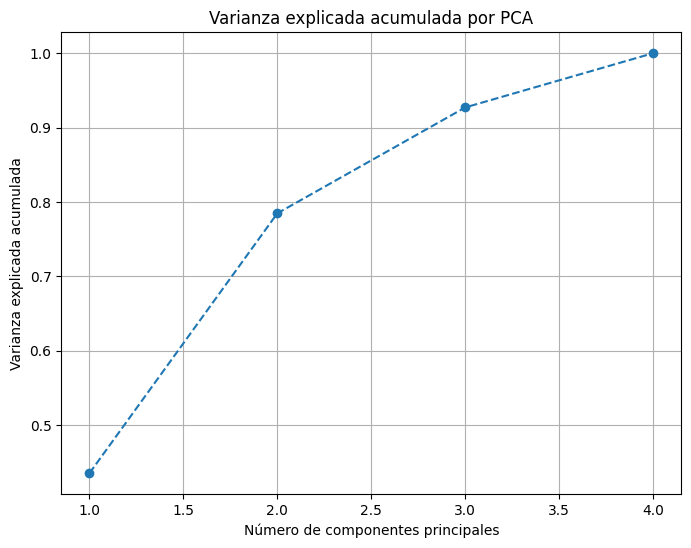

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Se Instancia PCA sin limitar el número de componentes
pca = PCA()

# Se ajusta PCA al conjunto de entrenamiento
pca.fit(x_train_pca_scaled)

# Se calcula la varianza explicada acumulada
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Se grafica la varianza explicada acumulada
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada por PCA')
plt.grid()
plt.show()

Análisis de la gráfica:
Se observa incremento inicial rápido:
Los primeros componentes explican una gran parte de la varianza total. Por ejemplo, los primeros 2 o 3 componentes capturan casi el 80% de la información.

Punto de codo (elbow point):
Se observa que la curva comienza a aplanarse alrededor del 2º componente. Esto indica que agregar más componentes después de este punto tiene un beneficio marginal en la cantidad de información explicada.

Porcentaje de varianza deseado:
Para explicar al menos el 90% de la varianza acumulada, se debería elegir entre 2 u 3 componentes, de acuerdo al análisis realizado mediante la gráfica.

In [ ]:
# Instanciar PCA con 2 componentes
pca = PCA(n_components=2)

# Ajustar y transformar el conjunto de entrenamiento
x_train_pca_transformed = pca.fit_transform(x_train_pca_scaled)

# Transformar el conjunto de prueba
x_test_pca_transformed = pca.transform(x_test_pca_scaled)

# Varianza explicada
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Varianza total explicada:", sum(pca.explained_variance_ratio_))

Varianza explicada por cada componente: [0.43511841 0.34953483]
Varianza total explicada: 0.7846532415087817


Los 3 componentes resultantes logran explicar el 78% de la varianza.

Se realiza prueba de validación del comportamiento de las variables transformadas con respecto a la variable a predecir.

In [ ]:
# Crear DataFrame temporal con los componentes PCA y la variable objetivo
df_pca_exploratorio = pd.DataFrame(x_train_pca_transformed, columns=['PCA1', 'PCA2'])
df_pca_exploratorio['Survived'] = y_train_cleaned.reset_index(drop=True) # Añadir la columna 'Survived' como las clases

# Verificar el DataFrame resultante
print(df_pca_exploratorio.head())

       PCA1      PCA2  Survived
0  2.438050 -0.974835         1
1 -1.149666 -0.065556         0
2 -1.151284 -0.065041         1
3 -1.152699 -0.064590         0
4  1.304418 -0.350964         0


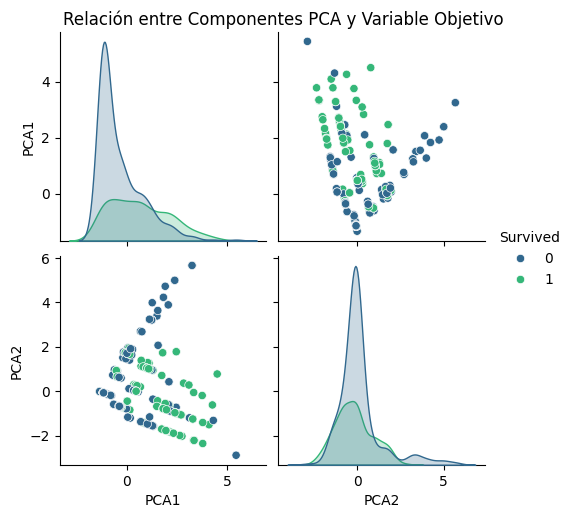

In [ ]:
# Usar seaborn para visualizar
sns.pairplot(df_pca_exploratorio, hue='Survived', diag_kind='kde', palette='viridis')
plt.suptitle('Relación entre Componentes PCA y Variable Objetivo', y=1.02)
plt.show()

El componente PCA1 es clave para la clasificación, mientras que PCA2 no aporta mucha información en terminos de predictibilidad del modelo, sin embargo se deja en el modelo para validar si con las demás variables no transformadas mejora su comportamiento.

Se crea DataFrame de componentes transformados, y se combinan los datos transformados o componentes, con las variables que no pasaron por PCA.

In [ ]:
# Se crea DataFrame de variables transformadas
x_train_pca_df = pd.DataFrame(x_train_pca_transformed, columns=['PCA1', 'PCA2'])
x_test_pca_df = pd.DataFrame(x_test_pca_transformed, columns=['PCA1', 'PCA2'])

# Combina los datos transformados por PCA con las variables no transformadas
x_train_final = pd.concat([x_train_pca_df, x_train_non_pca.reset_index(drop=True)], axis=1)
x_test_final = pd.concat([x_test_pca_df, x_test_non_pca.reset_index(drop=True)], axis=1)

In [ ]:
# Verifica los resultados
print("Shape de x_train_final:", x_train_final.shape)
print("Shape de x_test_final:", x_test_final.shape)

Shape de x_train_final: (536, 10)
Shape de x_test_final: (295, 10)


In [ ]:
x_train_final.head(5)

,PCA1,PCA2,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Embarked_nan,PassengerId,Age
0,2.438050,-0.974835,1.0,0.0,1.0,0.0,0.0,0.0,497,54.0
1,-1.149666,-0.065556,1.0,0.0,0.0,0.0,1.0,0.0,15,14.0
2,-1.151284,-0.065041,1.0,0.0,0.0,1.0,0.0,0.0,83,28.0
3,-1.152699,-0.064590,0.0,1.0,0.0,1.0,0.0,0.0,389,28.0
4,1.304418,-0.350964,0.0,1.0,1.0,0.0,0.0,0.0,274,37.0


Se verifica que una columna de las no transformadas por PCA, pero previamente transformada por One Hot Encoding, por presencia de ceros:

In [ ]:
# Contar ceros en la columna 'onehotencoder__Embarked_nan' de x_train_final
zeros_train = (x_train_final['onehotencoder__Embarked_nan'] == 0).sum()

# Contar ceros en la columna 'onehotencoder__Embarked_nan' de x_test_final
zeros_test = (x_test_final['onehotencoder__Embarked_nan'] == 0).sum()

print(f"Cantidad de ceros en 'onehotencoder__Embarked_nan' en x_train_final: {zeros_train}")
print(f"Cantidad de ceros en 'onehotencoder__Embarked_nan' en x_test_final: {zeros_test}")

Cantidad de ceros en 'onehotencoder__Embarked_nan' en x_train_final: 536
Cantidad de ceros en 'onehotencoder__Embarked_nan' en x_test_final: 294


Elimino la columna onehotencoder__Embarked_nan ya que está compuesta de solo ceros. Se observa que x_test de 295 tiene 294 ceros, es decir, hay un solo dato en la columna, sin embargo se opta por eliminar la variable, ya que no aporta suficiente información al modelo.

In [ ]:
x_train_final = x_train_final.drop(columns=['onehotencoder__Embarked_nan'])
x_test_final = x_test_final.drop(columns=['onehotencoder__Embarked_nan'])

Se verifica la eliminación

In [ ]:
# Verificar si la columna fue eliminada
print('onehotencoder__Embarked_nan' in x_train_final.columns)  # Debería ser False
print('onehotencoder__Embarked_nan' in x_test_final.columns)  # Debería ser False

False
False


**Se reentrena y evalúa el modelo con los datos transformados por PCA**

In [ ]:
# Reentrenar modelo con los datos transformados por PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

clasif = RandomForestClassifier(random_state=42)
clasif.fit(x_train_final, y_train_cleaned)  # Entrena con los datos proyectados

# Evaluar en el conjunto de prueba
y_pred = clasif.predict(x_test_final)

# Métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1-score: %.3f" % f1)

Accuracy: 0.7762711864406779
F1-score: 0.771


Matriz de Confusión

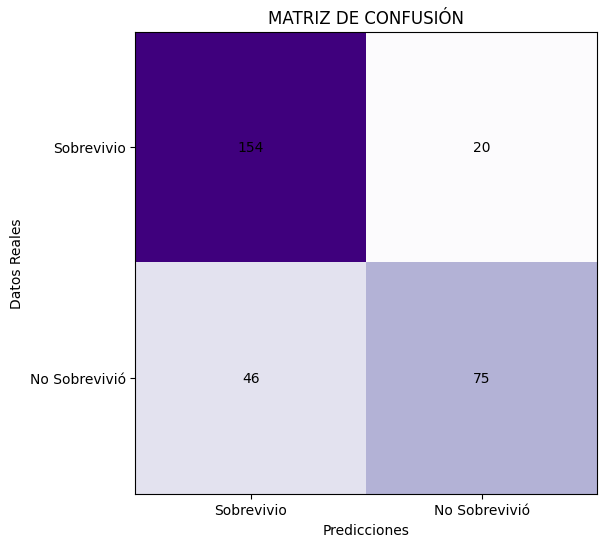

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_pred) #Creación de matriz de confusión
labels = ['Sobrevivio', 'No Sobrevivió'] # Etiquetas para la matriz de Confusión
fig, ax = plt.subplots(figsize=(8,6)) # Se crea figura y eje

ax.imshow(matriz, interpolation='nearest', cmap='Purples')
ax.set_title('MATRIZ DE CONFUSIÓN')
ax.set_xlabel('Predicciones')
ax.set_ylabel('Datos Reales')
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

#mostrar valores en la matriz
for i in range(matriz.shape[0]):
  for j in range(matriz.shape[1]):
    ax.text(j, i, matriz[i,j], ha= 'center', va='center', color='black')

plt.show()

### **Análisis de la Matriz de Confusión**

Se realiza el siguiente análisis:

Para "Sobrevivió" (clase positiva):
VP = 146
FN = 26 (errores al no detectar sobrevivientes)

El modelo pierde un 15,2% de los casos positivos reales (146 / (146 + 26) = 84.8% de sensibilidad).

Para "No sobrevivió" (clase negativa):

VN = 76
FP = 45 (errores al clasificar como sobrevivientes a quienes no lo son)

El modelo pierde un 37.2% de los casos negativos reales (76 / (76 + 45) = 62.8% de especificidad).

El modelo tiene menos falsos positivos (26) que falsos negativos (45), lo que implica que clasifica con más confianza la clase "No sobrevivió".

# **Tercera Entrega - Métricas de evaluación del modelo**

Calcular métrica Precisión

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.7894736842105263

 Calcular métrica Recall

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.6198347107438017

 Calcular métrica F1-Score

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.6944444444444444

**Reporte de Cálculo de métricas**

In [ ]:
from sklearn.metrics import classification_report
reporte=classification_report(y_test,y_pred)
print(reporte)

              precision    recall  f1-score   support

           0       0.77      0.89      0.82       174
           1       0.79      0.62      0.69       121

    accuracy                           0.78       295
   macro avg       0.78      0.75      0.76       295
weighted avg       0.78      0.78      0.77       295



**Cálculo y Gráfico de curva ROC**

roc_auc_score for RandomForest:  0.8250926189797664


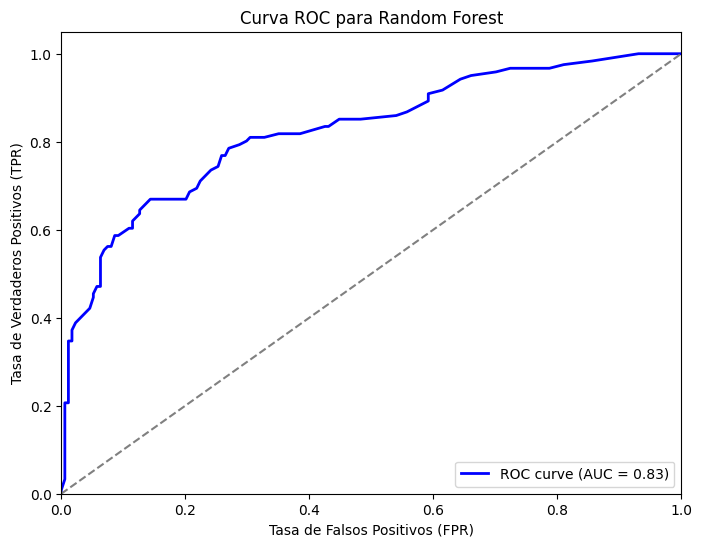

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Obtener las probabilidades de predicción para la clase positiva
y_prob = clasif.predict_proba(x_test_final)[:, 1]

# Calcular la Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

print('roc_auc_score for RandomForest: ', roc_auc_score(y_test, y_prob))

# Calcular el AUC (Área bajo la curva)
roc_auc = auc(fpr, tpr)

# Graficar la Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC para Random Forest')
plt.legend(loc='lower right')
plt.show()

La Curva ROC se muestra bien alejada de la diagonal, junto con un AUC alto, lo que indica que el modelo está funcionando bien en términos de discriminación entre las clases.

Log loss

In [ ]:
from sklearn.metrics import log_loss

# Calcular el Log Loss
loss = log_loss(y_test, y_prob)
print(f"Log Loss: {loss}")

Log Loss: 0.5204191300488682


### **Aplicación de GridSearchCV**

Se aplica GridSearchCV para optimizar los hiperparámetros del modelo, usando el clasificador Random Forest.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir el modelo base
rf_model = RandomForestClassifier(random_state=42)

# Definir el espacio de hiperparámetros a probar
param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras por hoja
    'max_features': ['sqrt', 'log2', None]  # Número de características a considerar para dividir
}

# Configurar el GridSearch
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='accuracy',  # Métrica para evaluar
    cv=5,  # Número de particiones en validación cruzada
    verbose=2,  # Mostrar el progreso
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Entrenar GridSearch en los datos de entrenamiento
grid_search.fit(x_train_final, y_train_cleaned)

# Mejor combinación de hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

# Mejor puntuación en validación cruzada
print("Mejor puntuación de validación cruzada:", grid_search.best_score_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Mejores hiperparámetros: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Mejor puntuación de validación cruzada: 0.8470231914157147


Se utilizan los mejores hiperparámetros para entrenar el modelo

In [ ]:
# Inicializar el modelo con los mejores hiperparámetros
best_params = {'max_depth': None,
               'max_features': 'sqrt',
               'min_samples_leaf': 2,
               'min_samples_split': 10,
               'n_estimators': 200}

best_model = RandomForestClassifier(**best_params, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
best_model.fit(x_train_final, y_train_cleaned)


RandomForestClassifier(min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200, random_state=42)

### **Se grafica la Matriz de Cunfusión y se generan métricas**

Accuracy: 0.7728813559322034

Reporte de clasificación:
                precision    recall  f1-score   support

   Sobrevivió       0.76      0.90      0.82       174
No sobrevivió       0.80      0.60      0.68       121

     accuracy                           0.77       295
    macro avg       0.78      0.75      0.75       295
 weighted avg       0.78      0.77      0.77       295



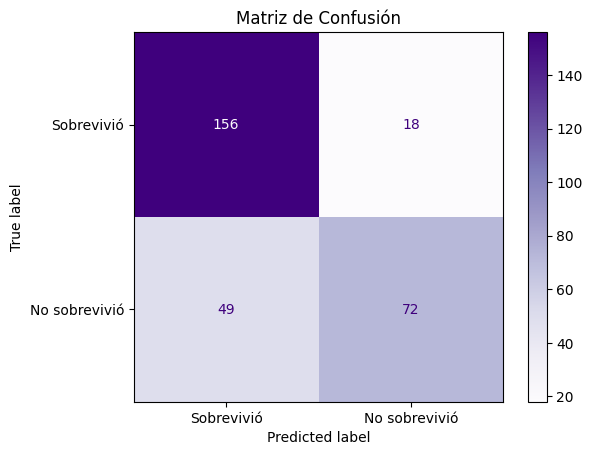

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(x_test_final)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, target_names=['Sobrevivió', 'No sobrevivió']))

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Graficar la matriz de confusión con etiquetas correctas
ConfusionMatrixDisplay.from_estimator(
    best_model,         # Modelo entrenado
    x_test_final,       # Conjunto de prueba
    y_test,     # Etiquetas reales del conjunto de prueba
    display_labels=['Sobrevivió', 'No sobrevivió'],  # Etiquetas en el orden correcto
    cmap='Purples'      # Paleta de colores
)
plt.title("Matriz de Confusión")
plt.show()

Se realiza el siguiente análisis:

Para "Sobrevivió" (clase positiva):
VP = 156
FN = 18 (errores al no detectar sobrevivientes)

El modelo pierde un 10.4% de los casos positivos reales (156 / (156 + 18) = 89.6% de sensibilidad).

Para "No sobrevivió" (clase negativa):

VN = 72
FP = 49 (errores al clasificar como sobrevivientes a quienes no lo son)

El modelo pierde un 40.5% de los casos negativos reales (72 / (72 + 49) = 59.5% de especificidad).

El modelo tiende a sobreestimar la clase "Sobrevivió", ya que tiene más falsos positivos que falsos negativos, lo que reduce su capacidad para identificar correctamente a quienes no sobrevivieron.

**Conclusión:** Ver conclusiones en el Readme del repositorio.